In [11]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2
import random
import os
import numpy as np
from PIL import Image

In [12]:
# Step-2

anno_path_box = "D:\Germany_present\TH Ingolstadt\Course related\Semester 3\Autonomous Vehicles by Machines Learning Algorithms\Project_work\sample-dayClip6\sample-dayClip6/frameAnnotationsBOX.csv"
anno_path_bulb = "D:\Germany_present\TH Ingolstadt\Course related\Semester 3\Autonomous Vehicles by Machines Learning Algorithms\Project_work\sample-dayClip6\sample-dayClip6/frameAnnotationsBULB.csv"
frames_path = "D:\Germany_present\TH Ingolstadt\Course related\Semester 3\Autonomous Vehicles by Machines Learning Algorithms\Project_work\sample-dayClip6\sample-dayClip6/frames/"

frame_id = random.choice(os.listdir(frames_path))
frame_path = os.path.join(os.path.join(frames_path,frame_id))
print("Found image:\t'{}'\nLocation:\t'{}'".format(frame_id, frame_path))

annotations = []
with open(anno_path_box) as fp:  
    line = fp.readline()
    line = fp.readline() # Skip header line with descriptions
    #cnt = 1
    while line:
        anno_file_path = (line.strip()).split(";")
        anno_file_id = anno_file_path[0].split("/")[1]
        if anno_file_id == frame_id:
            annotations.append(anno_file_path)
            #print("\t{}".format(anno_file_id))
        line = fp.readline()

Found image:	'dayClip6--00061.jpg'
Location:	'D:\Germany_present\TH Ingolstadt\Course related\Semester 3\Autonomous Vehicles by Machines Learning Algorithms\Project_work\sample-dayClip6\sample-dayClip6/frames/dayClip6--00061.jpg'


Found 3 annotations:
	Class: 'stop' at [180,273,198,300]
	Class: 'stop' at [683,310,698,332]
	Class: 'stopLeft' at [350,409,368,431]


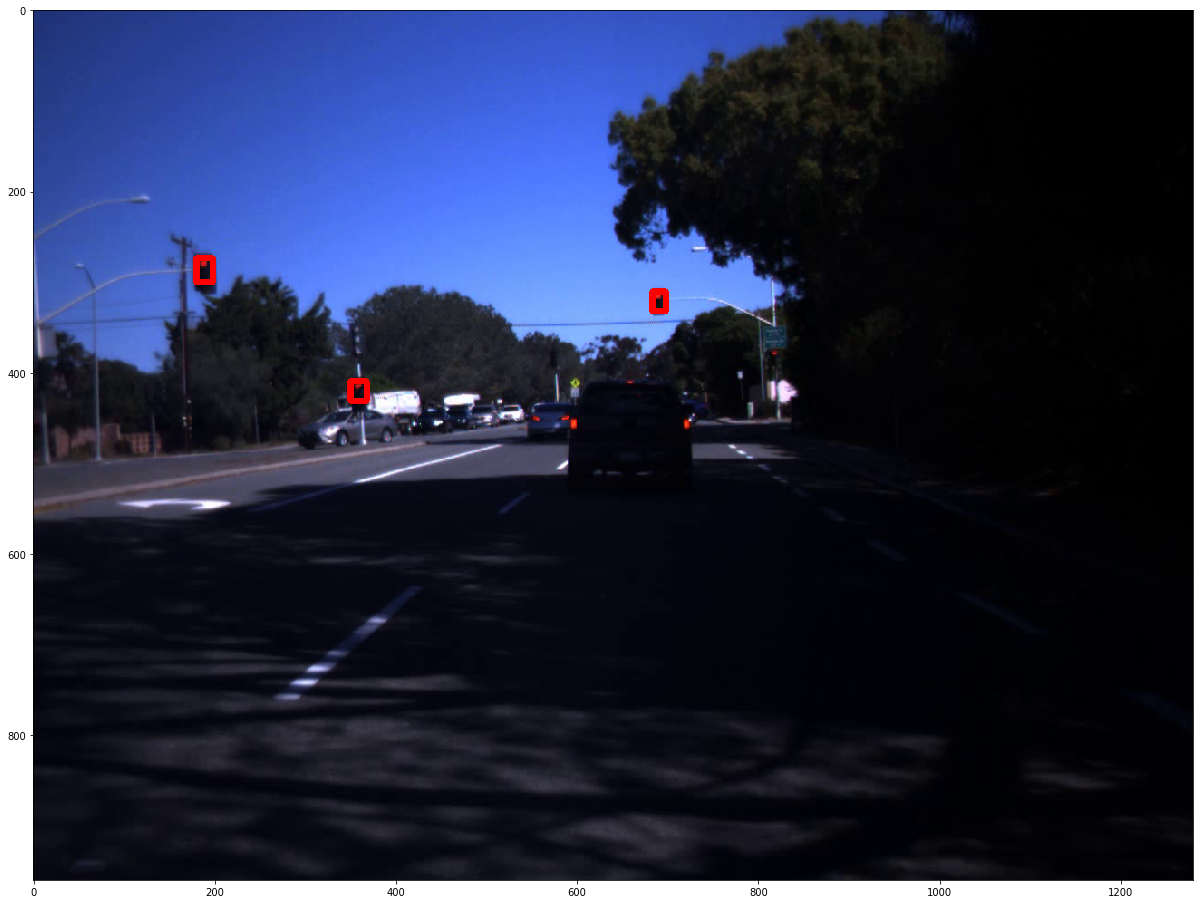

True

In [13]:
# Plot annotations on image

color_space = [(0,255,0),(255,0,0),(255,0,0)]
img = cv2.imread(frame_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Found {} annotations:".format(len(annotations)))

for anno in annotations:
    anno_class = anno[1]
    anno_left = int(anno[2])
    anno_top = int(anno[3])
    anno_right = int(anno[4])
    anno_bot = int(anno[5])
    print("\tClass: '{}' at [{},{},{},{}]".format(anno_class, anno_left, anno_top, anno_right, anno_bot))
    if anno_class == "go" or anno_class == "goLeft" or anno_class == "goForward":
        color_class = color_space[0]
    elif anno_class == "warning" or anno_class == "warningLeft":
        color_class = (255,255,0)
    elif anno_class == "stop" or anno_class == "stopLeft":
        color_class = (255,0,0)
    cv2.rectangle(img, (anno_left, anno_top), (anno_right, anno_bot), color_class, 5)

    plt.rcParams['figure.figsize'] = [32, 16]
plt.imshow(img)
plt.show()
cv2.imwrite('visualized_data.png',img)

True

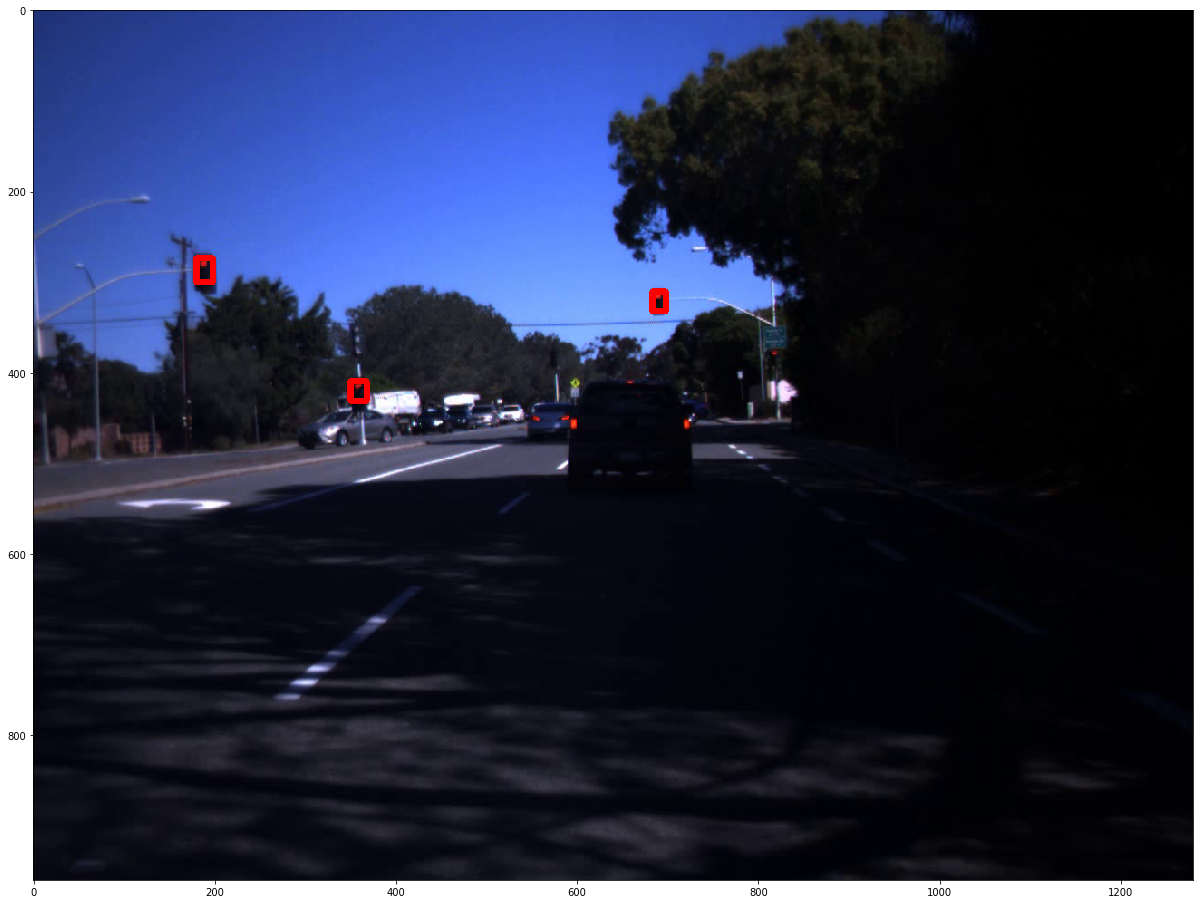

In [14]:
plt.imshow(img)
cv2.imwrite('Visualized_data.png',img)

In [15]:
print( anno_top, anno_bot, anno_left, anno_right)

409 431 350 368


In [17]:
crop_img = img[anno_top:anno_bot, anno_left:anno_right, :].copy()

grey_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
cv2.imshow("cropped", grey_img)
cv2.waitKey(0)
cv2.imwrite('cropped_gray-scale_data.png', grey_img)

True

In [9]:
print(grey_img.shape)

(45, 48)


In [10]:
img_pix = grey_img[:,:]
print(img_pix)

[[29 29 29 ... 29 29 29]
 [29 29 29 ... 29 29 29]
 [29 29 29 ... 29 29 29]
 ...
 [29 29 29 ... 29 29 29]
 [29 29 29 ... 29 29 29]
 [29 29 29 ... 29 29 29]]


In [28]:
np.savetxt("grey_img.csv", img_pix, delimiter=",")

In [29]:
import pandas as pd

In [31]:
im_pix = pd.DataFrame(img_pix)
im_pix

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
1,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
2,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
3,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
4,29,29,29,29,19,17,17,16,18,19,...,18,18,23,23,26,28,30,29,29,29
5,29,29,29,29,16,15,16,16,15,17,...,16,14,21,24,29,35,38,29,29,29
6,29,29,29,29,14,14,16,15,14,16,...,17,12,20,24,29,34,38,29,29,29
7,29,29,29,29,16,15,15,15,13,14,...,20,17,21,24,30,35,37,29,29,29
8,29,29,29,29,21,18,17,15,14,15,...,19,20,22,24,30,34,37,29,29,29
9,29,29,29,29,29,23,18,16,15,15,...,21,17,22,25,29,34,37,29,29,29
